In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [2]:
dt=pd.read_csv('weight-height.csv')

In [3]:
dt

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Density'>

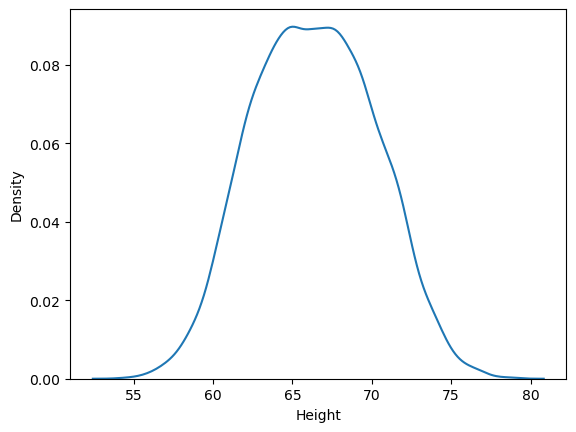

In [4]:
# sns.displot(dt['Height'])
sns.kdeplot(dt['Height'])

In [10]:
dt.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [11]:
x= dt[['Height']]

In [12]:
y = dt [['Weight']]

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2 , random_state=40)

In [17]:
nm=MinMaxScaler()

In [18]:
nm.fit(xtrain)

MinMaxScaler()

In [21]:
xnewtrain=nm.fit_transform(xtrain)
xnewtest=nm.fit_transform(xtest)

In [22]:
xnewtrain

array([[0.43125669],
       [0.58632186],
       [0.35750859],
       ...,
       [0.15302856],
       [0.14796588],
       [0.35777391]])

In [23]:
xnewtest

array([[0.63271434],
       [0.59824243],
       [0.38159442],
       ...,
       [0.44650729],
       [0.3853904 ],
       [0.69673491]])

In [24]:
xnewtrain = pd.DataFrame(xnewtrain,columns=xtrain.columns)
xnewtest = pd.DataFrame(xnewtest,columns=xtest.columns)

In [25]:
xnewtrain

,Height
0,0.431257
1,0.586322
2,0.357509
3,0.454017
4,0.193401
...,...
7995,0.428214
7996,0.433738
7997,0.153029
7998,0.147966


In [26]:
xnewtest

,Height
0,0.632714
1,0.598242
2,0.381594
3,0.323237
4,0.832087
...,...
1995,0.256296
1996,0.216415
1997,0.446507
1998,0.385390


<Axes: xlabel='Height', ylabel='Density'>

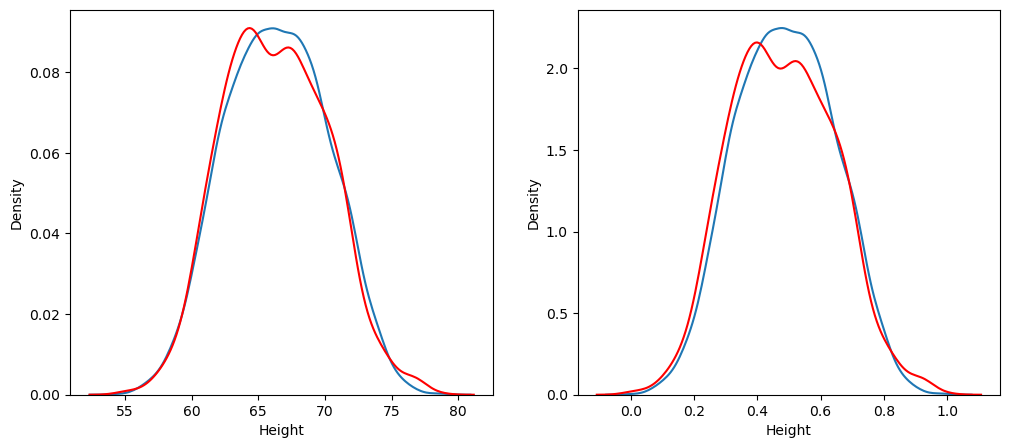

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(xtrain['Height'],ax=ax1)
sns.kdeplot(xtest['Height'],ax=ax1,color='red')
sns.kdeplot(xnewtrain['Height'],ax=ax2)
sns.kdeplot(xnewtest['Height'],ax =ax2,color='red')